In [1]:
from perceptron_layer import MLP_layer
from activation_functions_benedict import Sigmoid, Softmax, CCELoss
from mulit_layer_perceptron import MLP


In [2]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import random

## Load and process MNIST data

In [3]:
# self made functions

def one_hot_digits(targets):
    targets_hot = np.zeros((targets.shape[0],10))
    for t, t_hot in zip(targets, targets_hot):
        t_hot[t] = 1
    return targets_hot

def rescale(array, new_min, new_max):
    minimum, maximum = np.min(array), np.max(array)
    m = (new_max - new_min) / (maximum - minimum)
    b = new_min - m * minimum
    return m * array + b

def shuffle(X, Y_head):
    random_index = random.sample(range(len(X)), len(X))
    X_shuffled = X[random_index,:]
    Y_head_shuffled = Y_head[random_index,:]
    return X_shuffled, Y_head_shuffled

def minibatches(X, Y_head, batch_size):
    num_batches = int(len(X)/batch_size)
    if len(X)%batch_size != 0:
        num_batches = num_batches + 1
    X_minibatches=[]
    Y_head_minibatches=[]
    for i in range(num_batches):
        index = np.array(range(len(X)))
        mask = list(index % num_batches == i)
        X_minibatches.append(np.array(X[mask]))
        Y_head_minibatches.append(np.array(Y_head[mask]))
    return X_minibatches, Y_head_minibatches
    

def display_digit(image, target):
    image= np.reshape(image,(8,8))
    plt.imshow(image, cmap='gray')
    print(target)
    plt.show()
    
def try_network(mlp, X_batch, Y_batch):
    predictions = mlp.forward(X_batch)
    for image, target, prediction in zip(X_batch, Y_batch, predictions):
        image= np.reshape(image,(8,8))
        plt.imshow(image, cmap='gray')
        print(f"target: {np.argmax(target)}, prediction: {np.argmax(prediction)}")
        plt.show()

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


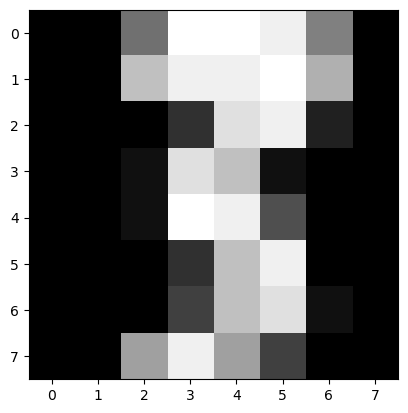

In [4]:
# load and process data
X, Y_head = load_digits(return_X_y=True)
X = rescale(X, 0, 1)
Y_head = one_hot_digits(Y_head)
X, Y_head = shuffle(X,Y_head)
X_batches, Y_head_batches = minibatches(X,Y_head, 10)
display_digit(X_batches[0][0], Y_head_batches[0][0])

## building and training a MLP

In [5]:
# build Perspetron
mlp = MLP(n_layers=4, n_units_per_layer=[100,50,30,10], input_size=64)

# train perceptron (later a function inside MLP)
loss = mlp.training(X_batches, Y_head_batches, epochs=500, learning_rate=0.5, loss_func=CCELoss())

  0%|                                                                                          | 0/500 [00:00<?, ?it/s]


ValueError: operands could not be broadcast together with shapes (9,) (9,10) 

In [ ]:
#print(loss)
plt.plot(loss)
plt.ylabel("CCE Loss")
plt.xlabel("epochs")
plt.show()

In [ ]:
try_network(mlp, X_batches[0], Y_head_batches[0])